In [35]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
import os

def traverse_directory(directory):
    l = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            l.append(os.path.join(root, file))
    return l

# Specify the directory you want to traverse
directory_to_traverse = 'dataset'

files = traverse_directory(directory_to_traverse)

'dataset\\Angelina Jolie\\001_fe3347c0.jpg'

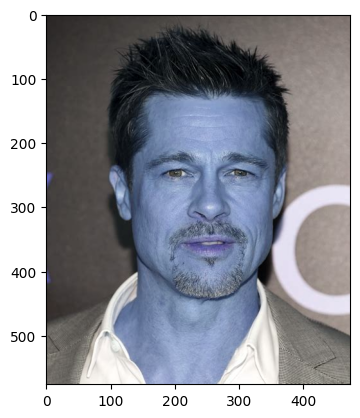

In [38]:
img = cv2.imread(files[100])
img.shape
plt.imshow(img)

In [39]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(576, 474)

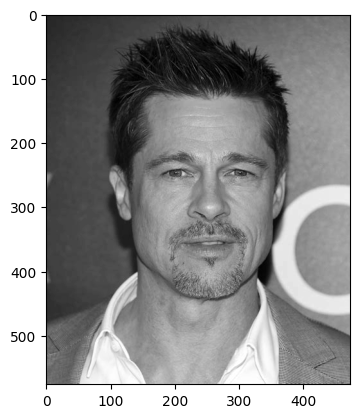

In [42]:
plt.imshow(gray, cmap="gray")

In [43]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[116, 140, 272, 272]])

In [44]:
(x,y,w,h) = faces[0] 

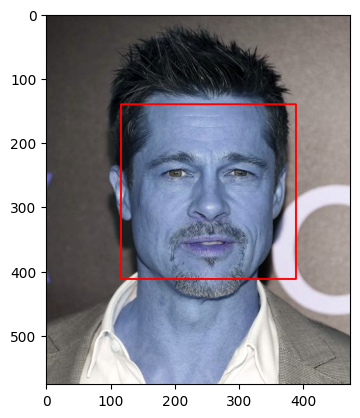

In [48]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h),(255,0,0), 2)
plt.imshow(face_img)

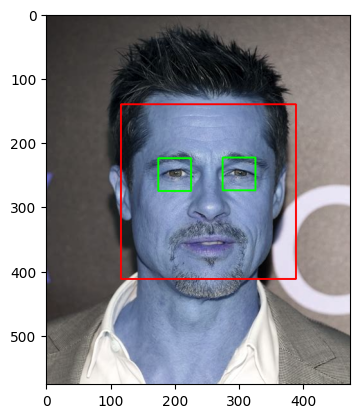

In [50]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

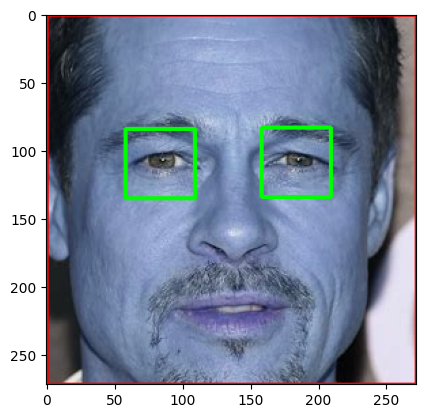

In [52]:
plt.imshow(roi_color)

In [53]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

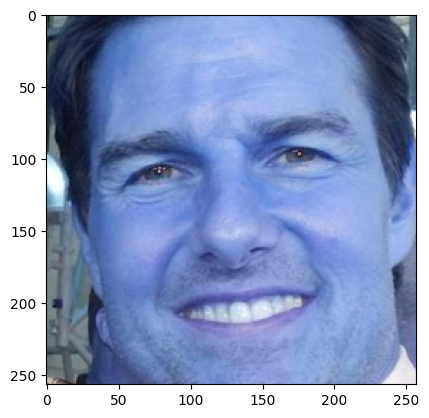

In [59]:
roi_color_sample = get_cropped_image_if_2_eyes()
plt.imshow(roi_color_sample)

In [ ]:
cropped_files